# Predict the price of a house

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Import Datasets

In [2]:
house_sales = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
house_sales.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1

In [4]:
# To know what type of datatypes are used in this dataframe.
house_sales.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

## Data Wrangling

Converting <code>'Transaction Date' </code> into a proper date

In [5]:
def proper_date(date):
    date = str(date)
    year,frac = date.split('.')
    y = '0.'+frac
    mon_dict = {'0.0': 'January',
                '0.0833333': 'Febuarary',
                '0.1666667': 'March',
                '0.25': 'April',
                '0.3333333': 'May',
                '0.4166667': 'June',
                '0.5': 'July',
                '0.5833333': 'August',
                '0.6666667': 'September',
                '0.75': 'October',
                '0.8333333': 'November',
                '0.9166667': 'December'}
    month = mon_dict[y]
    return month+' '+str(year)
house_sales['Transaction date'] = house_sales['Transaction date'].apply(proper_date)

In [6]:
# updated dataframe would look like
house_sales.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0    December 2012       32.0                                  84.87882   
1    December 2012       19.5                                 306.59470   
2      August 2013       13.3                                 561.98450   
3        July 2013       13.3                                 561.98450   
4    November 2012        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1

In [7]:
# checking if there is any null values
house_sales.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [8]:
house_sales.describe()

House Age  Distance from nearest Metro station (km)  \
count  414.000000                                414.000000   
mean    17.712560                               1083.885689   
std     11.392485                               1262.109595   
min      0.000000                                 23.382840   
25%      9.025000                                289.324800   
50%     16.100000                                492.231300   
75%     28.150000                               1454.279000   
max     43.800000                               6488.021000   

       Number of convenience stores    latitude   longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.094203   24.969030  121.533361   
std                        2.945562    0.012410    0.015347   
min                        0.000000   24.932070  121.473530   
25%                        1.000000   24.963000  121.528085   
50%                        4.000000   24.971100  121.538630   
75%                        6.000000   24.977455  121.543305   
max                       10.000000   25.014590  121.566270   

       Number of bedrooms  House size (sqft)  House price of unit area  
count          414.000000         414.000000                414.000000  
mean             1.987923         931.475845                 37.980193  
std              0.818875         348.910269                 13.606488  
min              1.000000         402.000000                  7.600000  
25%              1.000000         548.000000                 27.700000  
50%              2.000000         975.000000                 38.450000  
75%              3.000000        1234.750000                 46.600000  
max              3.000000        1500.000000                117.500000

In [9]:
import seaborn as sns

In [10]:
# checking if there are any outliers in the price
sns.boxplot(x = house_sales['House price of unit area'])

<AxesSubplot:xlabel='House price of unit area'>

As we can see that there are outlier in the <code>'House price of unit area'</code> column

In [11]:
q1 = house_sales['House price of unit area'].quantile(0.25)
q3 = house_sales['House price of unit area'].quantile(0.75)
inter_quantile_range = q3-q1
upper_limit = q3 + 1.5*inter_quantile_range
lower_limit = q1 - 1.5*inter_quantile_range

Writing a function for outlier to replace with the upper limit value.

In [12]:
def limiter_value(value):
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value

In [13]:
house_sales['House price of unit area'] = house_sales['House price of unit area'].apply(limiter_value)

Histogram

In [14]:
plt.hist(house_sales['House price of unit area'], bins = 10)
plt.show()

<AxesSubplot:>

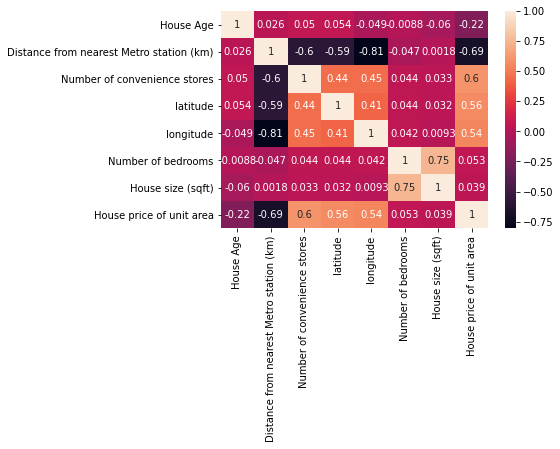

In [15]:
# we remove transaction column
new_table = house_sales.drop(columns = ['Transaction date'])
sns.heatmap(new_table.corr(numeric_only = False),annot=True)

From the correlation we can say that <code>'House price of the unit area'</code> area mostly depends on <code>'Distance nearest Metro Station'</code> and <code>'Number of convenience stores'</code>

## Model Development

To predict the <code>'House price of the unit area'</code> using the list of features:

In [16]:
features = ['House Age','Distance from nearest Metro station (km)','Number of convenience stores','latitude','longitude']

In [17]:
X = new_table[features]
y = new_table['House price of unit area']

### Normalize data

Data Standardization give data zero mean and unit variance

In [18]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

In [19]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 83
number of training samples: 331


## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [21]:
print("The accuracy of the linear regression model is {:.2f}%".format(lr.score(X_test,y_test)*100))

The accuracy of the linear regression model is 55.00%


## K Neighbors Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr_predict = knr.predict(X_test)

In [23]:
print("The accuracy of the K Neighbors Regressor model is {:.2f}%".format(knr.score(X_test,y_test)*100))

The accuracy of the K Neighbors Regressor model is 68.73%


As we can see that the K Neighbors Regressor has more accuraccy when compared linear regression. Linear regreession model Parametric, has a lot of assumptions that needs to be met for its data in regards to its distribution. Assumes a linear relationship between the dependent and independent variables.

Therefore it can be overcome by K Neighbors Regressor because non-parametric, makes no assumptions about the data/parameters in this model. No actual training step, new data is simply tagged to a majority class, based on historical data.

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [25]:
print("The accuracy of the decision tree model is {:.2f}%".format(dt.score(X_test,y_test)*100))

The accuracy of the decision tree model is 73.70%


As we can see that the decision tree has more accuraccy when compared K Neighbors Regressor because in K Neighbors Regressor model it can't handle data with missing values unless you apply imputation process.

Therefore it can be overcome by decision tree because it handles missing values very well,less effort in regards to preprocessing.

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [27]:
print("The accuracy of the Random Forest model is {:.2f}%".format(rf.score(X_test,y_test)*100))

The accuracy of the Random Forest model is 76.88%


As we can see that the Random Forest has more accuraccy when compared decision tree because in decision tree model it cannot handle large amount of data,take more time for training-time complexity to increase as the input increases.

Therefore it can be overcome by decision tree because it performs well on imbalanced data. works well with high dimensionality and handling a large amount of data.

From all the models we can conclude that random forest is the best predection model for the  given data

## Final Prediction model

In [28]:
# data given by the user
temp_dict = {}
for i in features:
    print('Enter the '+i+':')
    temp_dict[i] = [float(input())]
print('Enter the House size (sqft):')
house_size = float(input())
user_data = np.array(list(temp_dict.values()))
user_data = preprocessing.StandardScaler().fit_transform(user_data)
user_data = user_data.transpose()
rf_pred = rf.predict(user_data)
price = rf_pred*house_size
print('Price of the house is {:.2f} units'.format(price[0]))

Enter the House Age:
17.7
Enter the Distance from nearest Metro station (km):
83.4
Enter the Number of convenience stores:
10
Enter the latitude:
24.969030
Enter the longitude:
121.533361
Enter the House size (sqft):
931.5
Price of the house is 22448.22 units
